# Simple Diet Model


เด็กผู้หญิงคนหนึ่งกินอาหารวันละ 2,500 กิโลแคลอรี ใช้พลังงานในการเผาผลาญทั่วไป 1,200 กิโลแคลอรี ใช้พลังงานในการออกกำลังกายวันละ 16 กิโลแคลอรีต่อน้ำหนักตัว 1 กิโลกรัม และอัตราส่วนในการเปลี่ยนแปลงน้ำหนักตัวเป็นพลังงาน คือ น้ำหนัก 1 กิโลกรัม ต่อพลังงาน 10,000 กิโลแคลอรี 

ถ้าในเช้าวันอาทิตย์เธอมีน้ำหนัก 55 กิโลกรัม จงสร้างแบบจำลองทางคณิตศาสตร์เพื่อพยากรณ์น้ำหนักของเธอ 



**(อ้างอิงจาก ตัวอย่าง 4.22)**

$$\begin{align}  W_{n+1} & = W_n + \frac{ 1 }{10000} \cdot \left( 2500 - 1200 - 16 W_{n} \right)\\
& = W_n - \frac{ 16W_n }{10000} + \frac{ 2500-1200 }{10000}\\
& = 0.9984W_n + 0.13
\end{align}$$

โดยมีสูตรบีเนต์ในการหา $W_n$ คือ

$$ W_n = 0.9984^n W_0 + \frac{1-0.9984^n}{1-0.9984}(0.13) $$


In [2]:
weight_on_wed = 55
W_0 = weight_on_wed

print(f'Her initial weight at wednesday is {W_0} kg.')

Her initial weight at wednesday is 55 kg.


[0 1 2 3 4 5 6]
[55.         55.042      55.0839328  55.12579851 55.16759723 55.20932907
 55.25099415]


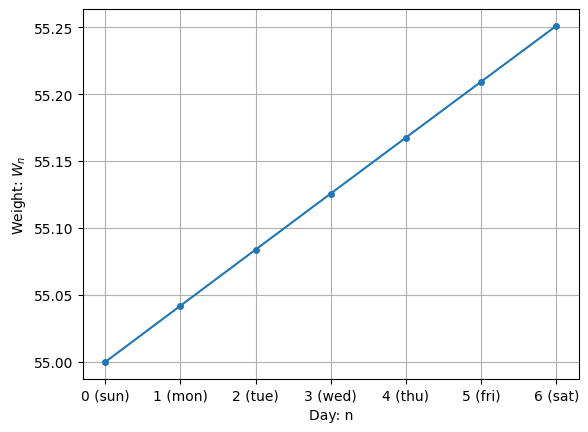

In [8]:
# Python with numpy
# Use the Binet Formula

import numpy as np
import matplotlib.pyplot as plt

days = 7
a = 0.9984
b = 0.13

n = np.arange(0, days)
W = (a**n)*W_0 + ((1 - a**n)/(1-a))*b

print(n)
print(W)

plt.plot(n, W, marker='o', markersize=4)
plt.grid()
plt.xlabel('Day: n');
plt.ylabel('Weight: $W_n$');

plt.xticks(n, ['0 (sun)', '1 (mon)', '2 (tue)', '3 (wed)', '4 (thu)', '5 (fri)', '6 (sat)']);

-------------

## 1

น้ำหนักของเธอในตอนเช้าของวันเสาร์ถัดไป


In [13]:
weight_on_sat = W[6]

print(f'Her weight on the next saturday is {weight_on_sat:.2f} kg.')

Her weight on the next saturday is 55.25 kg.


------------------

## 2

น้ำหนักของเธอในตอนเช้าของวันเสาร์ถัดไป ถ้าในวันพุธเธอกินอาหาร 3,500 กิโลแคลอรี

In [12]:
weight_on_wed = W[3]

weight_on_thu = (1/10000) * (10000*weight_on_wed + 3500 - 1200 - 16*weight_on_wed)

print(f'Her weight on the thursday is {weight_on_thu:.2f} kg.')

Her weight on the thursday is 55.12 kg.


[0 1 2]
[55.11807672 55.1598878  55.20163197]


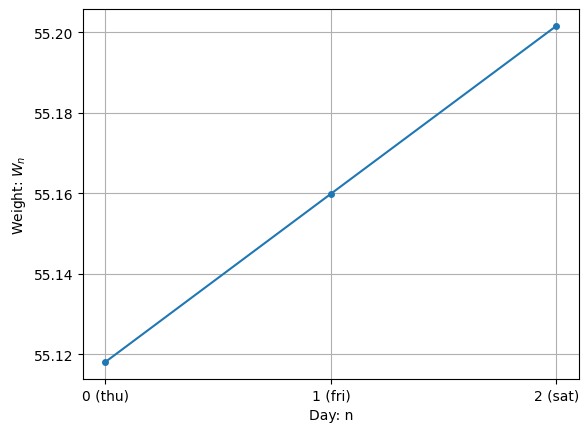

In [13]:
W_0 = weight_on_thu

days = 3
a = 0.9984
b = 0.13

n = np.arange(0, days)
W = (a**n)*W_0 + ((1 - a**n)/(1-a))*b

print(n)
print(W)

plt.plot(n, W, marker='o', markersize=4)
plt.grid()
plt.xlabel('Day: n');
plt.ylabel('Weight: $W_n$');

plt.xticks(n, ['0 (thu)', '1 (fri)', '2 (sat)']);

In [19]:
weight_on_sat = W[2]

print(f'Her weight on the next saturday is {weight_on_sat:.2f} kg.')

Her weight on the next saturday is 55.35 kg.


--------------------

## 3

ปริมาณอาหารที่เธอสามารถกินได้ในแต่ละวัน ถ้าเธอต้องการจะลดน้ำหนัก

กำหนดให้ $I$ ปริมาณพลังงานที่ได้รับจากกินอาหารในแต่ละวัน (กิโลแคลอรี) และ $X$ คือปริมาณพลังงานที่ใช้ไปในแต่ละวัน (กิโลแคลอรี)

แบบจำลองการเปลี่ยนแปลงของน้ำหนักตัว คือ 
$$\begin{align} W_{n+1} & = W_n + \frac{ 1 }{10000} \cdot \left( I - X - 16 W_{n} \right) \\
& = 0.9984W_n + \frac{I-X}{10000}
\end{align}$$

โดยมีสูตรบีเนต์ในการหา $W_n$ คือ

$$ W_n = 0.9984^n W_0 + \left( \frac{1-0.9984^n}{1-0.9984} \right) \cdot \left( \frac{I-X}{10000} \right) $$

เงื่อนไขที่ทำให้น้ำหนักของเธอลดลงคือ
$$ W_{n+1} < W_n $$

เราจะได้ว่า

$$\begin{align} 0.9984W_n + \frac{I-X}{10000} & < W_n, \\
\frac{I-X}{10000} & < 0.0016W_n, \\
I - X & < 10000(0.0016W_n)
\end{align}$$

นั่นคือ $$ I - X < 16W_n $$

หมายความว่า

**น้ำหนักของเธอจะลดลง ถ้าปริมาณพลังงานที่ได้รับจากกินอาหารในแต่ละวันมีถ้า ปริมาณพลังงานที่ได้รับจากกินอาหารในแต่ละวัน หักลบ ปริมาณพลังงานที่ใช้ไปในแต่ละวัน มีค่าน้อยกว่า 16 เท่าของน้ำหนักตัวปัจจุบัน**

ในกรณีที่น้ำหนักตัวเริ่มต้นคือ $W_0 = 55$ และ $X = 1200$ เงื่อนไขที่จะทำให้น้ำหนักเธอลดลงคือ
$$ I  < 16 \cdot 55 + 1200 =  2080 $$

[0 1 2 3 4 5 6]
[55.         54.992      54.9840128  54.97603838 54.96807672 54.9601278
 54.95219159]


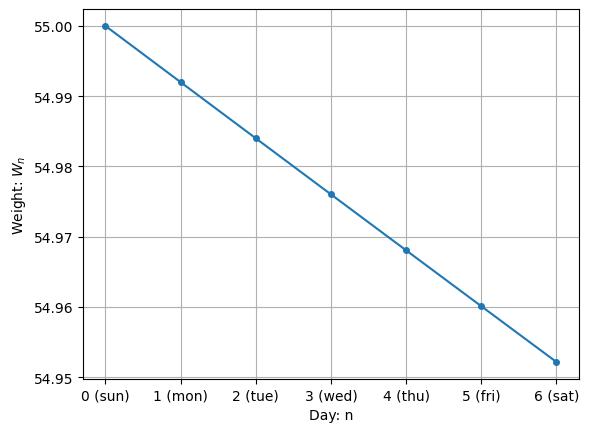

In [10]:
weight_on_wed = 55
W_0 = weight_on_wed


I = 2000
X = 1200
a = 0.9984
b = (I-X)/10000
days = 7

n = np.arange(0, days)
W = (a**n)*W_0 + ((1 - a**n)/(1-a))*b

print(n)
print(W)

plt.plot(n, W, marker='o', markersize=4)
plt.grid()
plt.xlabel('Day: n');
plt.ylabel('Weight: $W_n$');

plt.xticks(n, ['0 (sun)', '1 (mon)', '2 (tue)', '3 (wed)', '4 (thu)', '5 (fri)', '6 (sat)']);

--------------------

## 4

น้ำหนักน้อยสุดที่เธอสามารถลดได้ใน $ N $ สัปดาห์

จากแบบจำลองและค่าพารามิเตอร์ในข้อที่ 3 เราจะได้ว่าใน 1 สัปดาห์น้ำหนักของเธอลดลง
$$ W_0 - W_6 \approx 55 -  54.95219159 = 0.04780841 \text{     kg}$$

ดังนั้น ใน $ N $ สัปดาห์ เธอจะลดน้ำหนักได้อย่างน้อย $(W_0-W_6)\cdot N$ กิโลกรัม

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
[55.         54.992      54.9840128  54.97603838 54.96807672 54.9601278
 54.95219159 54.94426808 54.93635726 54.92845908 54.92057355 54.91270063
 54.90484031 54.89699257 54.88915738 54.88133473 54.87352459 54.86572695
 54.85794179 54.85016908 54.84240881 54.83466096 54.8269255  54.81920242
 54.81149169 54.80379331 54.79610724 54.78843347 54.78077197 54.77312274
 54.76548574 54.75786096 54.75024839 54.74264799 54.73505975 54.72748366
 54.71991968 54.71236781 54.70482802 54.6973003  54.68978462 54.68228096
 54.67478931 54.66730965 54.65984195 54.65238621 54.64494239 54.63751048
 54.63009047 54.62268232 54.61528603 54.60790157 54.60052893 54.59316808
 54.58581901 54.5784817  54.57115613 54.56384228 54.55654013 54.54924967
 54.54197087 54.53470372 54.52744819 54.52020427 54.51297

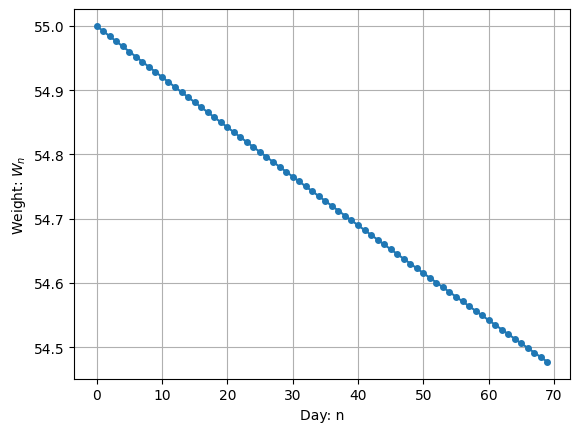

In [17]:
weight_on_wed = 55
W_0 = weight_on_wed


I = 2000
X = 1200
a = 0.9984
b = (I-X)/10000
days = 7*10

n = np.arange(0, days)
W = (a**n)*W_0 + ((1 - a**n)/(1-a))*b

print(n)
print(W)

plt.plot(n, W, marker='o', markersize=4)
plt.grid()
plt.xlabel('Day: n');
plt.ylabel('Weight: $W_n$');

--------------